## TRANSPORTS 1 grid cell from boundary 

## NOTEBOOK DESCRIPTION

Plots a cross-section of isopycnals and volume transports (U velocity * area of grid cell) for Feb 15 and Sep 15, 2015 (hindcast 201812), 1 grid cell away from the boundary (so, part of Parker's boundary conditions. 0 grid cells away from the boundary was behaving strangely, max rho = -0.2)

most transport in in february occurs on isopycnals 25-26, in september this moves to 26-27

note on bins: bins are by 0.2, from 20.0 to 26.8, and a bin for pycnal X includes the volume transports for all pyxcnals [X- 0.2, X].

So transport coming in on isopycnal 24.21 gets counted in bin 24.4, transport coming in on isopycnal 24.19 is counted in bin 24.2

In [18]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [20]:
from __future__ import print_function
from numpy import *
from scipy import *
import netCDF4 as nc
import numpy as np
import scipy as sp
import seawater
import datetime as dt
import pandas as pd

""
from salishsea_tools import (
    nc_tools,
    viz_tools, 
    geo_tools,
    tidetools
)
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import datetime as dt

%matplotlib inline

In [21]:
def make_nclen_hindcast(start,end,ftype, sdir):
    date_ar = []
    sens_ar = []
    doy_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        nc_sens = f"/results/SalishSea/hindcast.201812/{ddmmmyy}/*1d*{ymd}*{ftype}.nc"
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        date_ar.append(ddmmmyy)
        doy_ar.append(dddd)
    return date_ar, sens_ar, doy_ar

In [22]:
start = '2015-01-01'
end = '2015-12-31'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)

sdir_hc = '/results/SalishSea/hindcast.201812/*15/'

dates_hc, files_hc_dian, doy_hc = make_nclen_hindcast(start,end,'grid_U', sdir_hc)
dates_hc, files_hc_grid, doy_hc = make_nclen_hindcast(start,end,'grid_T', sdir_hc)



1
365


In [23]:
# #CODE TO EXTRACT DAILY VOLUME TRANSPORTS AND ISOPYCNALS 
# #1 grid cell in from boundary

# VOLtrans_stor = np.zeros([12, 40, 898])
# VOLtrans_stor_daily = np.zeros([365, 40, 898])
# rho_stor = np.zeros([12, 40, 898])
# rho_stor_daily = np.zeros([365, 40, 898])
# dist_from_bdy = 1

# # for d in range(0,len(sample_dates)):
# #     t_sample = sample_dates[d]
# #     doy = doy_hc[t_sample]
# #     tdate = dates_hc[t_sample]

# #     t_testU_BR = nc.Dataset(files_hc_dian[t_sample])
# #     UVEL = t_testU_BR['vozocrtx']
# #     UVEL_jdfmouth_BR = UVEL[:,:,:,dist_from_bdy]
# #     UVEL_jdfmouth2d_BR = np.squeeze(UVEL_jdfmouth_BR)

# #     depth_bounds = t_testU_BR['depthu_bounds']
# #     VOL_transports = area_cells_all * UVEL_jdfmouth2d_BR
    
# #     t_grid_BR = nc.Dataset(files_hc_grid[t_sample])
# #     S = t_grid_BR['vosaline']
# #     T = t_grid_BR['votemper']
# #     S_jdfmouth_BR = np.squeeze(S[:,:,:,dist_from_bdy])
# #     T_jdfmouth_BR = np.squeeze(T[:,:,:,dist_from_bdy])

# #     p_ref = 10.1325
# #     rho_jdfmouth_BR = gsw.rho(S_jdfmouth_BR,T_jdfmouth_BR,p_ref)
# #     rho_jdfmouth_BR_real = rho_jdfmouth_BR - 1000

# #     VOLtrans_stor[d,:,:] = VOL_transports
# #     rho_stor[d,:,:] = rho_jdfmouth_BR_real
    
    
# for d in range(0,365):
#     #t_sample = sample_dates[d]
#     if d%10 ==0:
#         print(d)
#     doy = doy_hc[d]
#     tdate = dates_hc[d]

#     t_testU_BR = nc.Dataset(files_hc_dian[d])
#     UVEL = t_testU_BR['vozocrtx']
#     UVEL_jdfmouth_BR = UVEL[:,:,:,dist_from_bdy]
#     UVEL_jdfmouth2d_BR = np.squeeze(UVEL_jdfmouth_BR)

#     depth_bounds = t_testU_BR['depthu_bounds']
#     VOL_transports = area_cells_all * UVEL_jdfmouth2d_BR
    
#     t_grid_BR = nc.Dataset(files_hc_grid[d])
#     S = t_grid_BR['vosaline']
#     T = t_grid_BR['votemper']
#     S_jdfmouth_BR = np.squeeze(S[:,:,:,dist_from_bdy])
#     T_jdfmouth_BR = np.squeeze(T[:,:,:,dist_from_bdy])

#     p_ref = 10.1325
#     rho_jdfmouth_BR = gsw.rho(S_jdfmouth_BR,T_jdfmouth_BR,p_ref)
#     rho_jdfmouth_BR_real = rho_jdfmouth_BR - 1000

#     VOLtrans_stor_daily[d,:,:] = VOL_transports
#     rho_stor_daily[d,:,:] = rho_jdfmouth_BR_real
    
# f = nc.Dataset('./rho_stor_vol_stor_daily2015.nc','w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('vol_and_pycnal')
# #g.createDimension('days', len(NO3_mod))
# g.createDimension('day', 365)
# g.createDimension('depth', 40)
# g.createDimension('xval',898)
# ts = g.createVariable('VOLtrans_stor_daily','f4',('day','depth','xval'))
# ts[:] = VOLtrans_stor_daily
# ts2 = g.createVariable('rho_stor_daily','f4',('day','depth','xval'))
# ts2[:] = rho_stor_daily

In [24]:
# np.shape(VOLtrans_stor_daily)
# vtcut = VOLtrans_stor_daily[0,:,370:475]
# rhocut = rho_stor_daily[0,:,370:475]
# rhorav = np.ravel(rhocut)
# plt.plot(rhorav)

In [25]:
# #CODE TO HISTOGRAM DAILY VOLUME TRANSPORT BY ISOPYCNAL

# pycnal_bins = np.arange(20.0,27,0.1)
# # Spyc_post_sum = np.zeros_like(pycnal_bins)
# # Spyc_negt_sum = np.zeros_like(pycnal_bins)
# # Fpyc_post_sum = np.zeros_like(pycnal_bins)
# # Fpyc_negt_sum = np.zeros_like(pycnal_bins)
# day_pospyc_stor = np.zeros([365,70])
# day_negpyc_stor = np.zeros([365,70])
# # feb_volr = np.ravel(feb_vol)
# # sep_volr = np.ravel(sep_vol)
# # feb_rhor = np.ravel(feb_rho)
# # sep_rhor = np.ravel(sep_rho)

# def find_nearest(array, value):
#     array = np.asarray(array)
#     idx = (np.abs(array - value)).argmin()
#     return idx, array[idx]

# for d in range(0,365):
#     if d%10 ==0:
#         print(d)
    
#     t_voltrans = VOLtrans_stor_daily[d,:,370:475]
#     t_rho = rho_stor_daily[d,:,370:475]
#     Fpyc_post_sum = np.zeros_like(pycnal_bins)
#     Fpyc_negt_sum = np.zeros_like(pycnal_bins)
    
#     feb_volr = np.ravel(t_voltrans)
#     feb_rhor = np.ravel(t_rho)
#     for i in range(0,len(feb_volr)):

#         t_fv = feb_volr[i]
#         t_frho = feb_rhor[i]
#         #find closest isopycnal
#         idx, clos = find_nearest(pycnal_bins,t_frho)
#         #if it's less than the number, move to one bin up
#         if clos <= t_frho:
#             idx_assign = idx+1
#         else:
#             idx_assign = idx
#         if (~isnan(t_fv)) & (t_fv >= 0):
#             Fpyc_post_sum[idx_assign] = Fpyc_post_sum[idx_assign] + t_fv
#         if (~isnan(t_fv)) & (t_fv < 0):
#             Fpyc_negt_sum[idx_assign] = Fpyc_negt_sum[idx_assign] + t_fv

#     day_pospyc_stor[d,:] = Fpyc_post_sum
#     day_negpyc_stor[d,:] = Fpyc_negt_sum
    
# f = nc.Dataset('./pycnal_hist_stor_daily2015.nc','w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('pycnal_hist')
# #g.createDimension('days', len(NO3_mod))
# g.createDimension('day', 365)
# g.createDimension('histbin', 70)
# ts = g.createVariable('day_pospyc_stor','f4',('day','histbin'))
# ts[:] = day_pospyc_stor
# ts2 = g.createVariable('day_negpyc_stor','f4',('day','histbin'))
# ts2[:] = day_negpyc_stor
# ts3 = g.createVariable('pycnal_bins','f4',('histbin'))
# ts3[:] = pycnal_bins

In [26]:
# open the above calculations from netcdfs
dist_from_bdy = 1
daily_volumes = nc.Dataset('rho_stor_vol_stor_daily2015.nc')
pycnal_hist = nc.Dataset('pycnal_hist_stor_daily2015.nc')

pycnal_bins = pycnal_hist['pycnal_hist']['pycnal_bins']
pos_pycnal = pycnal_hist['pycnal_hist']['day_pospyc_stor']
neg_pycnal = pycnal_hist['pycnal_hist']['day_negpyc_stor']

<class 'netCDF4._netCDF4.Group'>
group /vol_and_pycnal:
    dimensions(sizes): day(365), depth(40), xval(898)
    variables(dimensions): float32 VOLtrans_stor_daily(day,depth,xval), float32 rho_stor_daily(day,depth,xval)
    groups: 

In [27]:
cmap = cm.cm.thermal  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]


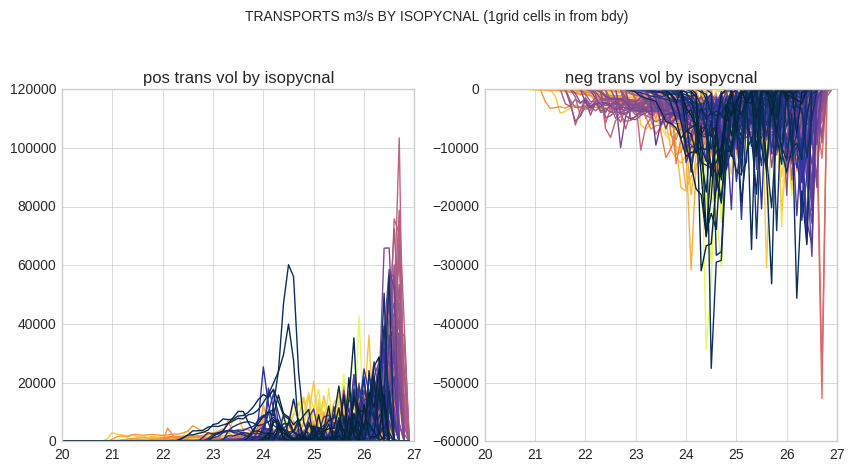

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%3 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('pos trans vol by isopycnal')
ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%3 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('neg trans vol by isopycnal')
#ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')

plt.suptitle('TRANSPORTS m3/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

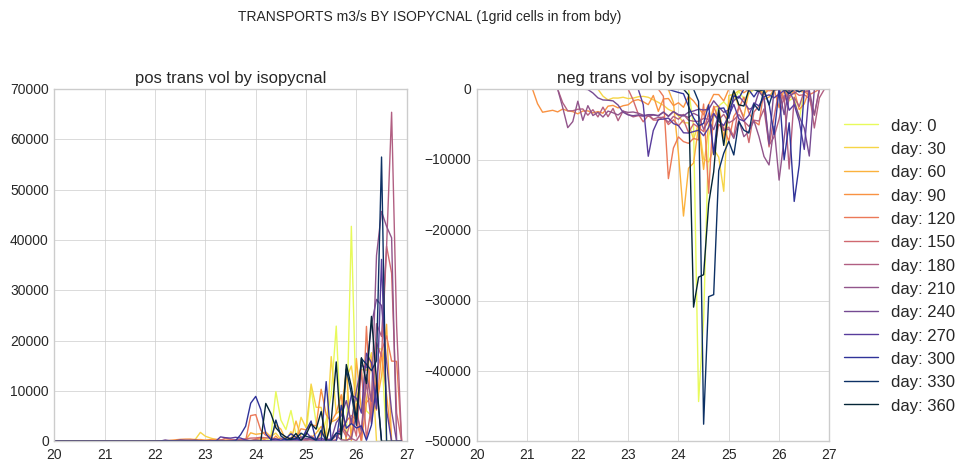

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('pos trans vol by isopycnal')
ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:],linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('neg trans vol by isopycnal')
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')

plt.suptitle('TRANSPORTS m3/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

In [30]:
anas_ndic = pd.read_csv('./ana_ndic_trends.csv')
ana_pyc = anas_ndic['pycnal']
ana_ndic_inc = anas_ndic['ndic_inc']
ana_ndic_inc30 = anas_ndic['ndic_inc'] *30

#broadcast Ana's data onto our pycnal bins
pycnal_inc30 = np.zeros_like(pycnal_bins)
# print(pycnal_bins[36])
# print(ana_pyc[34])
pycnal_inc30[36:70] = ana_ndic_inc30[0:34]

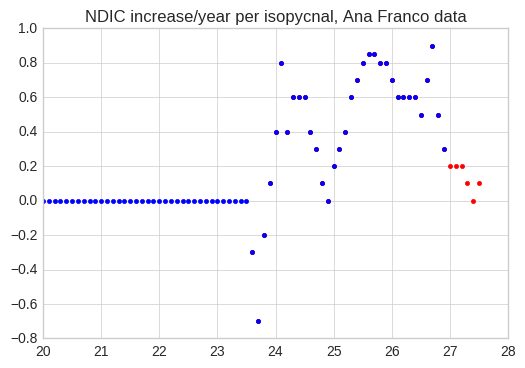

In [31]:
plt.plot(ana_pyc,ana_ndic_inc,'r.')
plt.plot(pycnal_bins,pycnal_inc30/30,'b.')
plt.title('NDIC increase/year per isopycnal, Ana Franco data')

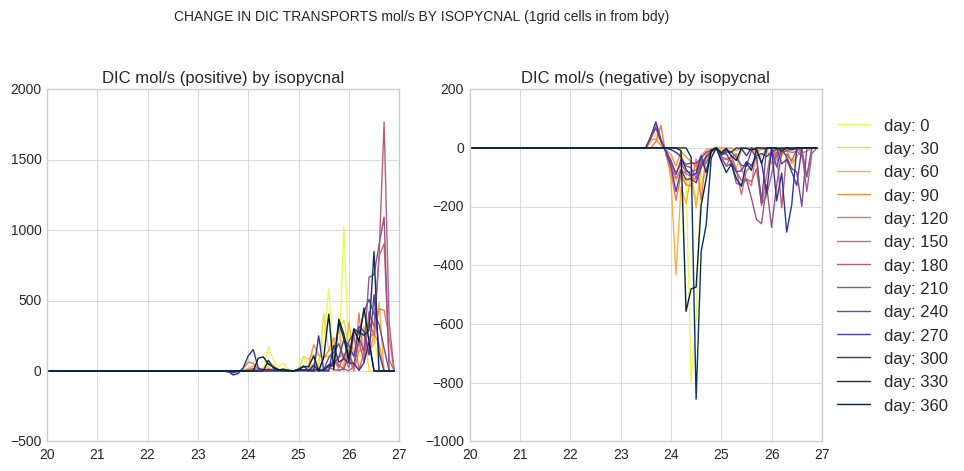

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,pos_pycnal[i,:]*pycnal_inc30/1000,linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
    ax.set_title('DIC mol/s (positive) by isopycnal')
ax = fig.add_subplot(2,2,2)
for i in range(0,365):
    if i%30 == 0:
        yrprop = int(((365-i) /(365)) * 256) -1
        ax.plot(pycnal_bins,neg_pycnal[i,:]*pycnal_inc30/1000,linestyle = '-', color = cmaplist[yrprop], label = 'day: '+ str(i))
ax.set_title('DIC mol/s (negative) by isopycnal')
ax.legend(bbox_to_anchor=[1.2, 0.5], loc='center')

plt.suptitle('CHANGE IN DIC TRANSPORTS mol/s BY ISOPYCNAL ('+ str(dist_from_bdy) +
             'grid cells in from bdy)')

In [33]:
total_DICin_change = np.zeros(365)
total_DICout_change = np.zeros(365)

for i in range(0,365):
    dic_trans_in = pos_pycnal[i,:]*pycnal_inc30
    total_DICin_change[i] = np.sum(dic_trans_in)
    dic_trans_out = neg_pycnal[i,:]*pycnal_inc30
    total_DICout_change[i] = np.sum(dic_trans_out)

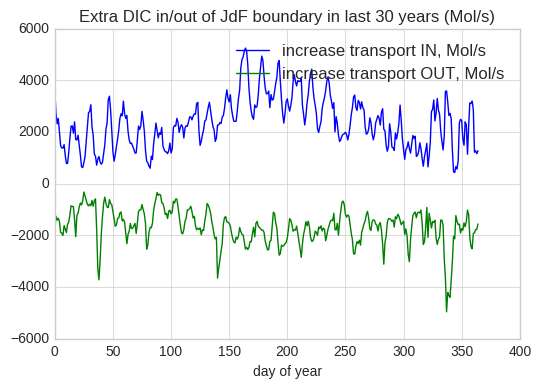

In [34]:
plt.title('Extra DIC in/out of JdF boundary in last 30 years (Mol/s)')
plt.plot(total_DICin_change/1000,label = 'increase transport IN, Mol/s')
plt.plot(total_DICout_change/1000, label = 'increase transport OUT, Mol/s')
plt.legend()
plt.xlabel('day of year')



In [35]:
t_dir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/'


preind_nc = nc.Dataset(t_dir + 'preind_DIC/calculated_new_DIC_corrected' +
                  '/LO_corrected_y2015m01d01_preind_DIC.nc')

presday_nc = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_'+
                       'y2015m01d01.nc')

preind_nc_DIC = preind_nc['preindustrial_DIC']['preind_dic']
presday_nc_DIC = presday_nc['DIC']
# preind_nc_TA = preind_nc['TA']
# presday_nc_TA = presday_nc['TA']

for i in range(0,10):
    preind_DIC_res = np.zeros([40,10,95])
    preind_DIC_res[:,i,:] = preind_nc_DIC[:,i*95:(i+1)*95]
    preind_DIC_res[preind_DIC_res ==0 ] = nan
    preind_mean_DIC = np.nanmean(preind_DIC_res,axis = 1)
    presday_DIC_res = np.zeros([40,10,95])
    presday_DIC_res[:,i,:] = presday_nc_DIC[0,:,0,i*95:(i+1)*95]
    presday_DIC_res[presday_DIC_res ==0 ] = nan
    presday_mean_DIC = np.nanmean(presday_DIC_res,axis = 1)

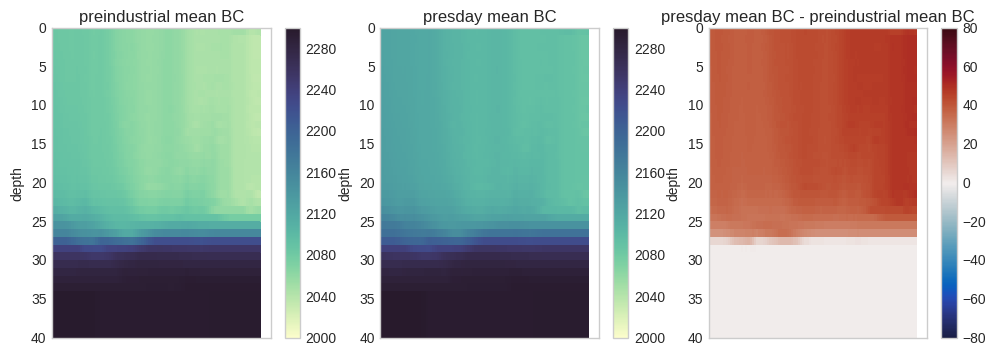

In [36]:
fig = plt.figure(figsize=(12,4))
nop = 3
for i in range(1,nop+1):

    if i == 1:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = preind_mean_DIC
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('preindustrial mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 2:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.deep
        cmap = tcmap
        tplt = presday_mean_DIC
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=2000, vmax=2300)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        
    if i == 3:
        ax = fig.add_subplot(1,3,i)
        tcmap = cm.cm.balance
        cmap = tcmap
        tplt = presday_mean_DIC - preind_mean_DIC
        mesh = ax.pcolormesh(tplt, cmap = tcmap, vmin=-80, vmax=80)
        cbar = fig.colorbar(mesh, ax=ax)
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('presday mean BC - preindustrial mean BC') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])

In [42]:
daily_vol = daily_volumes['vol_and_pycnal']['VOLtrans_stor_daily']
daily_rho = daily_volumes['vol_and_pycnal']['rho_stor_daily']
t_testU_BR = nc.Dataset('/results/SalishSea/hindcast.201812/01jan15/SalishSea_1d_20150101_20150101_grid_U.nc')
zlevels = t_testU_BR.variables['depthu']

In [53]:
dicdiff_bcs = np.zeros([40,898])
dicdiff_bcs[:,375:(375+95)] = (presday_mean_DIC - preind_mean_DIC)

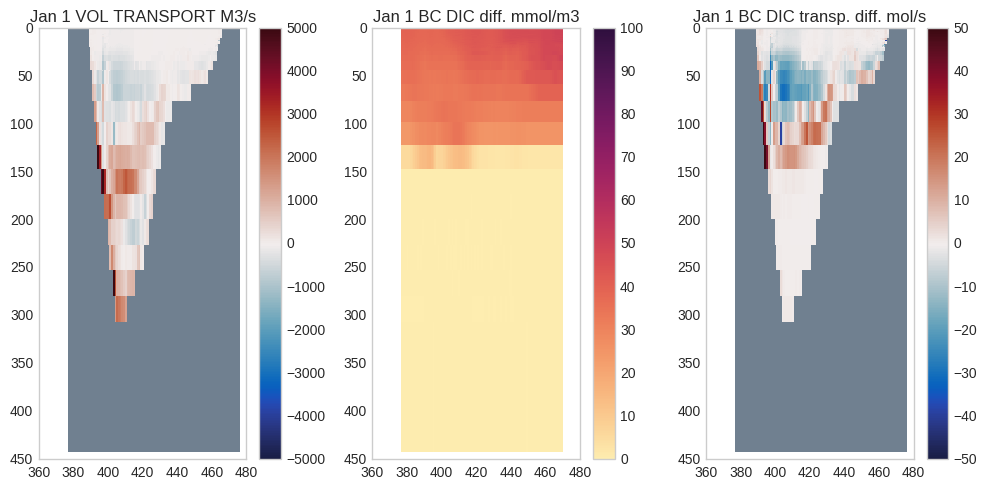

In [74]:
fig = plt.figure(figsize=(10,5))

xst = 377
xen = 477
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    section_slice = np.arange(xst,xen)
    if i == 1:
        ax.invert_yaxis()
        sd = daily_vol[0,:,xst:xen]
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-5000, vmax=5000 )
        ax.set_title('Jan 1 VOL TRANSPORT M3/s')
        cbar = fig.colorbar(mesh, ax=ax)


    if i == 2:
        ax.invert_yaxis()
        sd = dicdiff_bcs[:,xst:xen]
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.matter
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0, vmax=100 )
        ax.set_title('Jan 1 BC DIC diff. mmol/m3')
        cbar = fig.colorbar(mesh, ax=ax)

    if i == 3:
        ax.invert_yaxis()
        sd = dicdiff_bcs[:,xst:xen]*daily_vol[0,:,xst:xen]/1000
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-50, vmax=50 )
        ax.set_title('Jan 1 BC DIC transp. diff. mol/s')
        cbar = fig.colorbar(mesh, ax=ax)
        
fig.tight_layout()

In [75]:
sd2 = np.copy(dicdiff_bcs[:,xst:xen]*daily_vol[0,:,xst:xen]/1000)

In [76]:
sd2[sd2<0] =0

In [77]:
np.sum(np.sum(sd2))

2048.6477031264194

In [82]:

daymon = [31,28,31,30,31,30,31,31,30,31,30,31]
daymon_LY = [31,29,31,30,31,30,31,31,30,31,30,31]
year = 2015
year_ar = []
noday = 365
t_daymon = daymon

for m in range(1,13):
    if m>=10:
        tm = str(m)
    if m<10:
        tm = '0' + str(m)
    for d in range(1,t_daymon[m-1]+1):
        if d>=10:
            td = str(d)
        if d<10:
            td = '0' + str(d)

        tstr = 'y' + str(year) + 'm' + tm + 'd' + td
        year_ar.append(tstr)

In [87]:
#open 2 dic diff bc files
#subtract them
#put this subtraction onto the 
t_dir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/PI_BOUND_COND/'
xst = 377
xen = 477
dic_in_diff = np.zeros(365)
dic_out_diff = np.zeros(365)
for d in range(0,365):
    if d%10 == 0:
        print(d)
    #open dic diff bc files
    preind_nc = nc.Dataset(t_dir + 'preind_DIC/calculated_new_DIC_corrected' +
                      '/LO_corrected_' + year_ar[d] +'_preind_DIC.nc')

    presday_nc = nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201905_'+
                           year_ar[d] + '.nc')

    preind_nc_DIC = preind_nc['preindustrial_DIC']['preind_dic']
    presday_nc_DIC = presday_nc['DIC']
    # preind_nc_TA = preind_nc['TA']
    # presday_nc_TA = presday_nc['TA']

    for i in range(0,10):
        preind_DIC_res = np.zeros([40,10,95])
        preind_DIC_res[:,i,:] = preind_nc_DIC[:,i*95:(i+1)*95]
        preind_DIC_res[preind_DIC_res ==0 ] = nan
        preind_mean_DIC = np.nanmean(preind_DIC_res,axis = 1)
        presday_DIC_res = np.zeros([40,10,95])
        presday_DIC_res[:,i,:] = presday_nc_DIC[0,:,0,i*95:(i+1)*95]
        presday_DIC_res[presday_DIC_res ==0 ] = nan
        presday_mean_DIC = np.nanmean(presday_DIC_res,axis = 1)
        
    #difference 
    dicdiff_bcs = np.zeros([40,898])
    dicdiff_bcs[:,375:(375+95)] = (presday_mean_DIC - preind_mean_DIC)
    
    sd2 = np.copy(dicdiff_bcs[:,xst:xen]*daily_vol[d,:,xst:xen]/1000)
    sd2[sd2<0] =0
    sd4 = np.copy(dicdiff_bcs[:,xst:xen]*daily_vol[d,:,xst:xen]/1000)
    sd4[sd4>0] =0
    
    dic_in_diff[d] = np.sum(np.sum(sd2))
    dic_out_diff[d] = np.sum(np.sum(sd4))
    

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360


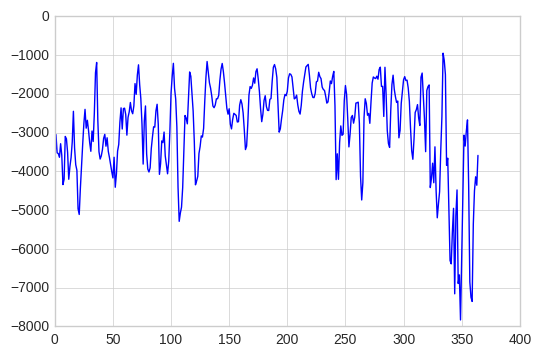

In [91]:
plt.plot(dic_out_diff)

In [111]:
f = nc.Dataset('./Tetjana_meth_trans_inout2.nc','w', format='NETCDF4') #'w' stands for write
g = f.createGroup('DIC_trans')
#g.createDimension('days', len(NO3_mod))
g.createDimension('day', 365)
ts = g.createVariable('dic_in_diff','f4',('day'))
ts[:] = dic_in_diff
ts = g.createVariable('dic_out_diff','f4',('day'))
ts[:] = dic_out_diff
ts = g.createVariable('dic_out_diff2','f4',('day'))
ts[:] = dic_out_diff

In [108]:
dic_out_diff

array([-3899.10989622, -3048.05002934, -3520.02589497, -3538.44723477,
       -3634.97356138, -3284.50813589, -3584.14019443, -4339.56802758,
       -4201.78746447, -3096.68069566, -3158.53334492, -3506.21076415,
       -4201.74654249, -3875.14383006, -3642.89954027, -3240.1133284 ,
       -2447.96799114, -3392.61189673, -3826.76283461, -3967.52862677,
       -4961.49136278, -5110.40343594, -4430.53537894, -3846.59008444,
       -3292.08911987, -2764.70731454, -2397.83445996, -2883.38232327,
       -2679.61444405, -2938.68122522, -3257.41273718, -3480.2259489 ,
       -2956.60825382, -3226.6658633 , -2502.80245294, -1453.08908064,
       -1187.54595726, -2676.89276347, -3491.22773574, -3679.93440931,
       -3597.56034724, -3432.31616868, -3146.560247  , -3043.22038515,
       -3348.26518089, -3131.47546497, -3479.87550134, -3640.8189921 ,
       -3833.15208365, -4007.64185263, -4167.03907537, -3633.68057839,
       -4407.90182992, -4062.91831676, -3475.18053357, -3303.88395856,
      

In [106]:
w = nc.Dataset('Tetjana_meth_trans_inout2.nc')
w['DIC_trans']['dic_out_diff'][:]

array([-3899.1099, -3048.05  , -3520.026 , -3538.4473, -3634.9736,
       -3284.508 , -3584.1401, -4339.568 , -4201.7876, -3096.6807,
       -3158.5334, -3506.2107, -4201.7466, -3875.1438, -3642.8997,
       -3240.1133, -2447.968 , -3392.6118, -3826.763 , -3967.5286,
       -4961.491 , -5110.4033, -4430.535 , -3846.59  , -3292.089 ,
       -2764.7073, -2397.8345, -2883.3823, -2679.6145, -2938.6812,
       -3257.4128, -3480.2258, -2956.6082, -3226.6658, -2502.8025,
       -1453.0891, -1187.5459, -2676.8928, -3491.2278, -3679.9343,
       -3597.5603, -3432.3162, -3146.5603, -3043.2205, -3348.2651,
       -3131.4756, -3479.8755, -3640.819 , -3833.152 , -4007.6418,
       -4167.039 , -3633.6807, -4407.902 , -4062.9182, -3475.1804,
       -3303.884 , -2727.7595, -2359.2346, -2904.8835, -2377.517 ,
       -2367.3425, -2528.0576, -3063.559 , -2603.5842, -2464.5942,
       -2220.4775, -2435.9573, -2510.6821, -2307.404 , -1733.2545,
       -2009.6841, -1512.7864, -1248.6262, -1759.2499, -2118.9